In [2]:
import numpy as np

In [3]:
np.__version__

'1.21.2'

##### Points to notify


- comparison operators
- counting entries
- boolean arrays as mask
- fancy indexing
- combined indexing
- selecting random points
- binning data

This section covers the use of Boolean masks to examine and manipulate values
within NumPy arrays. Masking comes up when you want to extract, modify, count, or
otherwise manipulate values in an array based on some criterion: for example, you
might wish to count all values greater than a certain value, or perhaps remove all out‐
liers that are above some threshold. In NumPy, Boolean masking is often the most
efficient way to accomplish these types of tasks.

##### Comparison Operators as ufuncs

In “Computation on NumPy Arrays: Universal Functions” on page 50 we introduced
ufuncs, and focused in particular on arithmetic operators. We saw that using +, -, *, /, and others on arrays leads to element-wise operations. NumPy also implements com‐
parison operators such as < (less than) and > (greater than) as element-wise ufuncs.
The result of these comparison operators is always an array with a Boolean data type.
All six of the standard comparison operations are available:

In [6]:
x = np.array([1, 2, 3, 4, 5])
x < 3

array([ True,  True, False, False, False])

It is also possible to do an element-by-element comparison of two arrays, and to
include compound expressions:

In [9]:
(2 * x) == (x ** 2)

array([False,  True, False, False, False])

##### Counting entries

To count the number of True entries in a Boolean array, np.count_nonzero is useful:

In [13]:
np.count_nonzero(x < 6) # how many values less than 6?

5

In [14]:
np.sum(x < 6)

5

In [15]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [16]:
# are there any values greater than 8?
np.any(x > 8)

True

In [17]:
# are there any values less than zero?
np.any(x < 0)

False

In [18]:
# are all values less than 10?
np.all(x < 10)

True

In [19]:
# are all values equal to 6?
np.all(x == 6)

False

In [20]:
# are all values in each row less than 8?
np.all(x < 8, axis=1)

array([ True, False,  True])

##### Boolean Arrays as Masks

In the preceding section, we looked at aggregates computed directly on Boolean
arrays. A more powerful pattern is to use Boolean arrays as masks, to select particular
subsets of the data themselves. Returning to our x array from before, suppose we
want an array of all values in the array that are less than, say, 5:

In [21]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

We can obtain a Boolean array for this condition easily, as we’ve already seen:

In [22]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

Now to select these values from the array, we can simply index on this Boolean array;
this is known as a masking operation:

In [24]:
x[x < 5]

array([0, 3, 3, 3, 2, 4])

What is returned is a one-dimensional array filled with all the values that meet this
condition; in other words, all the values in positions at which the mask array is True.

##### Fancy Indexing

In the previous sections, we saw how to access and modify portions of arrays using
simple indices (e.g., `arr[0]`), slices (e.g., `arr[:5]`), and Boolean masks (e.g., `arr[arr > 0])` 

In this section, we’ll look at another style of array indexing, known as fancy
indexing. Fancy indexing is like the simple indexing we’ve already seen, but we pass
arrays of indices in place of single scalars. This allows us to very quickly access and
modify complicated subsets of an array’s values.

##### Exploring Fancy Indexing

In [25]:
rand = np.random.RandomState(42)
x = rand.randint(100, size=10)
x

array([51, 92, 14, 71, 60, 20, 82, 86, 74, 74])

Suppose we want to access three different elements. We could do it like this:

In [26]:
[x[3], x[7], x[2]]


[71, 86, 14]

Alternatively, we can pass a single list or array of indices to obtain the same result:

In [27]:
ind = [1,2,3]
x[ind]

array([92, 14, 71])

With fancy indexing, the shape of the result reflects the shape of the index arrays
rather than the shape of the array being indexed:

In [28]:
ind = np.array([[3, 7],
    [4, 5]])
x[ind]

array([[71, 86],
       [60, 20]])

Fancy indexing also works in multiple dimensions. Consider the following array:

In [31]:
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

Like with standard indexing, the first index refers to the row, and the second to the
column:

In [32]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

##### Combined Indexing

For even more powerful operations, fancy indexing can be combined with the other
indexing schemes we’ve seen:

We can combine fancy and simple indices:

In [33]:
 X[2, [2, 0, 1]]

array([10,  8,  9])

We can also combine fancy indexing with slicing:

In [34]:
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

And we can combine fancy indexing with masking:

In [35]:
mask = np.array([1, 0, 1, 0], dtype=bool)
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

All of these indexing options combined lead to a very flexible set of operations for
accessing and modifying array values.

##### Example: Selecting Random Points

One common use of fancy indexing is the selection of subsets of rows from a matrix.
For example, we might have an N by D matrix representing N points in D dimen‐
sions, such as the following points drawn from a two-dimensional normal distribu‐
tion:

In [36]:
mean = [0, 0]
cov = [[1, 2],
    [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape


(100, 2)

Using the plotting tools we will discuss in Chapter 4, we can visualize these points as a scatter plot.

In [37]:
import matplotlib.pyplot as plt

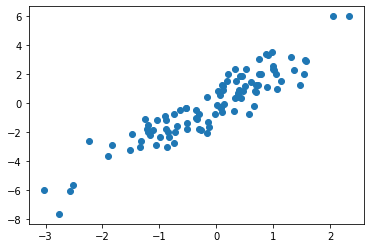

In [38]:
plt.scatter(X[:,0], X[:,1])

Let’s use fancy indexing to select 20 random points. We’ll do this by first choosing 20
random indices with no repeats, and use these indices to select a portion of the origi‐
nal array:

In [39]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([67,  6, 93,  2, 65,  8, 80, 19, 71, 57, 53,  0, 47, 24, 77, 79, 32,
       89, 37, 25])

In [40]:
selection = X[indices]  # fancy indexing here
selection.shape

(20, 2)

Now to see which points were selected, let’s over-plot large circles at the locations of the selected points.

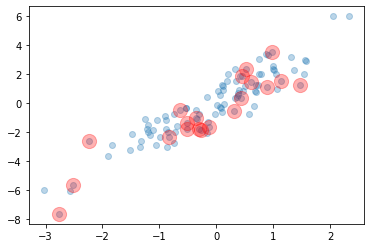

In [47]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1],facecolor='red', s=200, alpha=0.3);

###### Modifying Values with Fancy Indexing

Just as fancy indexing can be used to access parts of an array, it can also be used to
modify parts of an array. For example, imagine we have an array of indices and we’d
like to set the corresponding items in an array to some value:

In [48]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


We can use any assignment-type operator for this. For example:

In [49]:
x[i] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


Notice, though, that repeated indices with these operations can cause some potentially unexpected results. Consider the following:

In [50]:
x = np.zeros(10)
x = np.zeros(10)
print(x)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Where did the 4 go? The result of this operation is to first assign x[0] = 4, followed
by x[0] = 6. The result, of course, is that x[0] contains the value 6.<br>

Fair enough, but consider this operation:

In [52]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x

array([0., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

You might expect that x[3] would contain the value 2, and x[4] would contain the
value 3, as this is how many times each index is repeated. Why is this not the case?
Conceptually, this is because x[i] += 1 is meant as a shorthand of x[i] = x[i] + 1.
x[i] + 1 is evaluated, and then the result is assigned to the indices in x. With this in
mind, it is not the augmentation that happens multiple times, but the assignment,
which leads to the rather nonintuitive results.

So what if you want the other behavior where the operation is repeated? For this, you
can use the at() method of ufuncs (available since NumPy 1.8), and do the following:

In [53]:
x = np.zeros(10)
np.add.at(x, i, 1)
print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


The at() method does an in-place application of the given operator at the specified
indices (here, i) with the specified value (here, 1). Another method that is similar in
spirit is the reduceat() method of ufuncs, which you can read about in the NumPy
documentation.

##### Example: Binning Data

You can use these ideas to efficiently bin data to create a histogram by hand. For
example, imagine we have 1,000 values and would like to quickly find where they fall
within an array of bins. We could compute it using ufunc.at like this:

In [61]:
np.random.seed(42)
x = np.random.randn(100)


# compute a histogram by hand
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)


# find the appropriate bin for each x
i = np.searchsorted(bins, x)

# add 1 to each of these bins
np.add.at(counts, i, 1)

The counts now reflect the number of points within each bin—in other words, a histogram

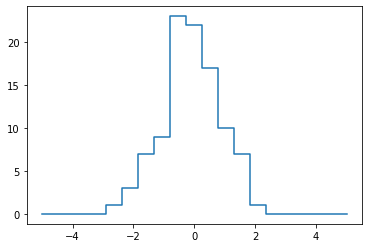

In [70]:
# plot the results
plt.step(bins, counts, linestyle='solid')

Of course, it would be silly to have to do this each time you want to plot a histogram.
This is why Matplotlib provides the plt.hist() routine, which does the same in a
single line:

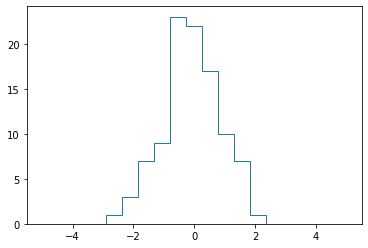

In [73]:
plt.hist(x, bins, histtype='step');